In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pi = np.pi
exp = np.exp
sqrt = np.sqrt
sin = np.sin
cos = np.cos

In [3]:
def Euler_method(f, a, b, h, y_0):
    n = int((b - a)/h)
    d = len(y_0)
    
    t = np.linspace(a, b, n+1)
    w = np.zeros((d, n+1))
    w[:, 0] = y_0
    
    for i in range(n):
        w[:, i+1] = w[:, i] + h*(f(t[i], w[:, i]))
        
    return t, w

In [4]:
def Trapezoid_method(f, a, b, h, y_0):
    n = int((b - a)/h)
    d = len(y_0)
    
    t = np.linspace(a, b, n+1)
    w = np.zeros((d, n+1))
    w[:, 0] = y_0
    
    for i in range(n):
        w[:, i+1] = w[:, i] + (f(t[i], w[:, i]) + f(t[i] + h, w[:, i] + h*f(t[i], w[:, i])))*(h/2)
        
    return t, w

# 例1

In [5]:
def p(x):
     return x**3 + 2*x**2 + 3*x + 4
    
A=np.array([[0,1,0],[0,0,1],[-4,-3,-2]])
print(A)

e,v =np.linalg.eig(A)
print(e)
print(v)

for i in range(3):
    print(p(e[i]))

[[ 0  1  0]
 [ 0  0  1]
 [-4 -3 -2]]
[-1.65062919+0.j         -0.1746854 +1.54686889j -0.1746854 -1.54686889j]
[[ 0.29950465+0.j          0.31972698-0.07314531j  0.31972698+0.07314531j]
 [-0.49437111+0.j          0.05729457+0.50735314j  0.05729457-0.50735314j]
 [ 0.81602339+0.j         -0.79481731+0.j         -0.79481731-0.j        ]]
(8.881784197001252e-16+0j)
2.6645352591003757e-15j
-2.6645352591003757e-15j


In [17]:
print(v[:,1],e[1])
print(A.dot(v[:,1])/v[:,1])
print(np.linalg.inv(v).dot(A.dot(v)))

[ 0.31972698-0.07314531j  0.05729457+0.50735314j -0.79481731+0.j        ] (-0.17468540428030566+1.546868887231396j)
[-0.1746854+1.54686889j -0.1746854+1.54686889j -0.1746854+1.54686889j]
[[-1.65062919e+00-2.34988887e-17j -6.44735482e-16+2.19161783e-15j
  -3.68628134e-16-2.37671178e-15j]
 [ 5.87985856e-16-5.84143017e-16j -1.74685404e-01+1.54686889e+00j
   6.93889390e-17-1.22124533e-15j]
 [ 6.43497007e-16+5.84143017e-16j -1.38777878e-17+9.99200722e-16j
  -1.74685404e-01-1.54686889e+00j]]


# 洛伦兹方程组

In [53]:
a, b = 0, 50
h = 0.001

delta = 10**(-5)
init_cond = (5, 5, 5)
init_cond2 = (5+delta, 5, 5)

def Lorenz(t, xyz):
    x, y, z = xyz
    s = 10
    r = 20
    b = 8/3
    
    x_ = -s*x + s*y
    y_ = -x*z + r*x - y
    z_ = x*y - b*z
    
    return np.array([x_, y_, z_])

t, w1 = Euler_method(Lorenz, a, b, h, init_cond)
t, w2 = Euler_method(Lorenz, a, b, h, init_cond2)

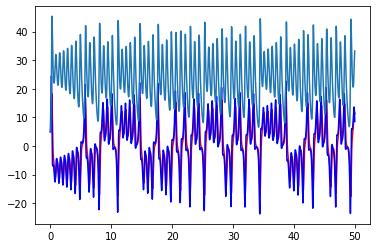

In [35]:
plt.plot(t, w1[0], label="Euler's Method $x$",color="red")
plt.plot(t, w1[1], label="Euler's Method $y$",color="blue")
plt.plot(t, w1[2], label="Euler's Method $z$")

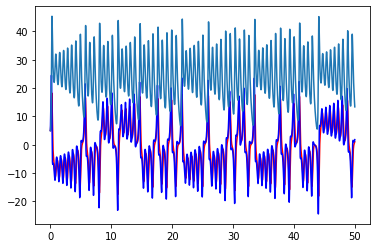

In [36]:
plt.plot(t, w2[0], label="Euler's Method $x$",color="red")
plt.plot(t, w2[1], label="Euler's Method $y$",color="blue")
plt.plot(t, w2[2], label="Euler's Method $z$")

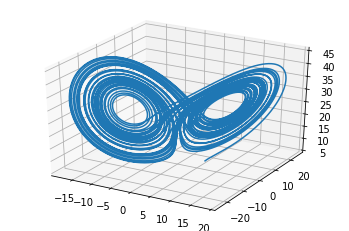

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(w1[0],w1[1],w1[2])
plt.show()

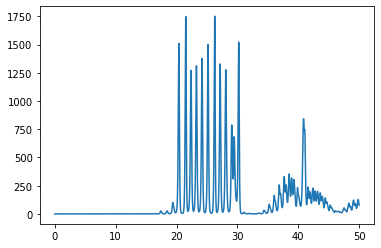

In [54]:
plt.plot(t,(w1[0]-w2[0])**2+(w1[1]-w2[1])**2+(w1[2]-w2[2])**2)

# 钟摆

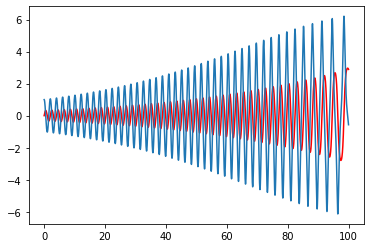

In [56]:
a, b = 0, 100
h = 0.005
y_0 = (0, 1)

def f(t, y):
    y1, y2 = y
    g = 9.81
    l = 1
    return np.array([y2, -g/l*sin(y1)])

t, y = Euler_method(f, a, b, h, y_0)

plt.plot(t, y[0], 'r-',label="Euler's Method $x$",color="red")
plt.plot(t, y[1], label="Euler's Method $y$")

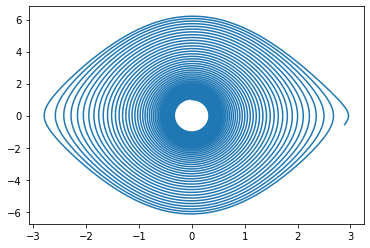

In [57]:
plt.plot(y[0],y[1])

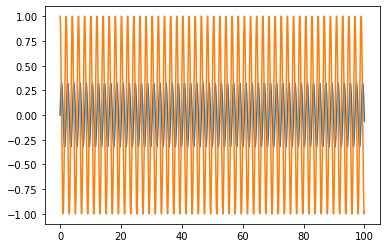

In [58]:
a, b = 0, 100
h = 0.005
y_0 = (0, 1)

def f(t, y):
    y1, y2 = y
    g = 9.81
    l = 1
    return np.array([y2, -g/l*sin(y1)])

t, y =Trapezoid_method(f, a, b, h, y_0)

plt.plot(t, y[0], label="Euler's Method $x$")
plt.plot(t, y[1], label="Euler's Method $y$")

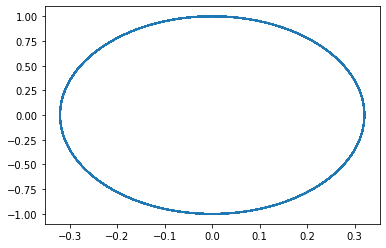

In [59]:
plt.plot(y[0],y[1])